In [2]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

    100% |████████████████████████████████| 1.9MB 26.6MB/s ta 0:00:011
You are using pip version 19.0.3, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
    100% |████████████████████████████████| 16.9MB 4.5MB/s eta 0:00:01
You are using pip version 19.0.3, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached https://files.pythonhosted.org/packages/47/bb/849011636c4da2e44f1253cd927cfb20ada4374d8b3a4e425416e84900cc/tqdm-4.64.1-py2.py3-none-any.whl
You are using pip version 19.0.3, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
    100% |████████████████████████████████| 7.3MB 12.7MB/s ta 0:00:

In [3]:
# The starter code is short and simple, take a look!
from starter import *

# Phase 1 - Create Inputs

In [4]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    for i in range(100):
        for j in range(i+1, 100):
            if i == 0:
                G.add_edge(i, j, weight = 1000)
            elif i > 96:
                G.add_edge(i, j, weight = 1000)
            else:
                G.add_edge(i, j, weight = i + 100)
                
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    for i in range(15, 55):
        for j in range(i+1, 55):
             G.add_edge(i, j, weight = 100)
    for i in range(55, 100):
        for j in range(i + 1, 150):
             G.add_edge(i, j, weight = 128)
    for i in range(100, 300):
        for j in range(i + 1, 300):
            if np.random.randint(0, 11) <= 2:
                 G.add_edge(i, j, weight = np.random.randint(500, 1000))
                
            
    
def large(G: nx.Graph):
    for i in range(500):
        G.add_edge(i, i+500, weight = 1000)

def test(G: nx.Graph):
    for i in range(49):
        G.add_edge(i, i+1, weight = 100)



In [52]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in', True)
print(validate_graph(G))

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in', True)
print(validate_graph(G))

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in', True)
print(validate_graph(G))


True
True
True


# Phase 2 - Implement your Solver

In [11]:
import networkx as nx 

def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    numnodes = G.number_of_nodes()
    conflicts = {}
    for i in range(0, numnodes):
        conflicts[i] = [n for n in G.neighbors(i)]
    teams = {0 : [0]}
    for node in range(1, numnodes):
        found = False
        best_fit = 0
        min_size = float('inf')
        for team in range(len(teams)):
            conflictfound = False
            for conflict in conflicts[node]:
                if conflict in teams[team]:
                    conflictfound = True
                    break
            if not conflictfound:
                if len(teams[team]) < min_size:
                    min_size = len(teams[team])
                    best_fit = team
                    found = True
        if not found:
            teams[len(teams)] = [node]
        else:
            teams[best_fit].append(node)
    for team in range(len(teams)):
        for node in teams[team]:
            G.nodes[node]['team'] = team + 1
    team_sizes = []
    for i in range(len(teams)):
        team_sizes.append(len(teams[i]))
    mini = float('inf')
    maxi = 0
    for size in team_sizes:
        if size < mini:
            mini = size
        if size > maxi:
            maxi = size
    if numnodes == 100:
        if maxi - mini > 95:
            for node in range(numnodes):
                G.nodes[node]['team'] = 1
                return
    elif numnodes == 300:
        if maxi - mini > 275:
            for node in range(numnodes):
                G.nodes[node]['team'] = 1
                return
    else:
        if maxi - mini > 950:
            for node in range(numnodes):
                G.nodes[node]['team'] = 1
                return
    
    
    


            







    

In [12]:
G = read_input('inputs/small180.in')
solve(G)
score(G)

26540.72173963533

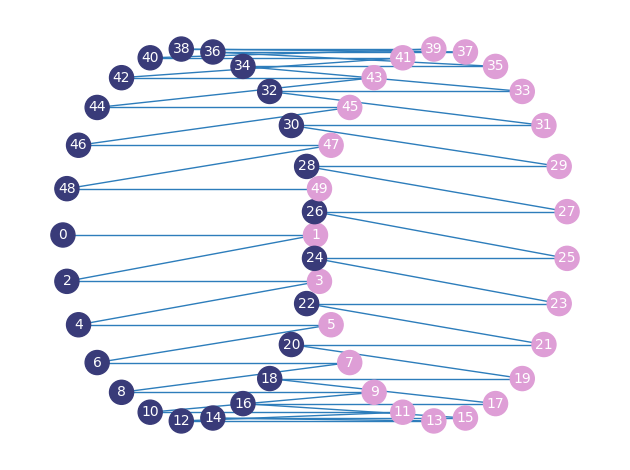

272.8281828459045

In [13]:
G = nx.empty_graph(50)
test(G)
solve(G)
validate_output(G)
visualize(G)
score(G)

In [14]:
G = read_input('Submitted_large.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

FileNotFoundError: [Errno 2] No such file or directory: 'Submitted_large.in'

In [15]:
run(solve, 'small.in', 'small.out', True)

FileNotFoundError: [Errno 2] No such file or directory: 'small.in'

In [16]:
run_all(solve, 'inputs', 'outputs', True)
tar('outputs', True)

  0%|          | 0/781 [00:00<?, ?it/s]

inputs/large225.in: cost 1268.335570452889
inputs/small232.in: cost 40450.46838954691
inputs/large116.in: cost 1.1656026349855428e+21
inputs/large59.in: cost 2364744709223.171
inputs/small150.in: cost 2415495286.524443
inputs/large147.in: cost 9436064.027790498
inputs/small101.in: cost 5.184705528587072e+23
inputs/small197.in: cost 198275939.04062444
inputs/small206.in: cost 274.5192813972861
inputs/large240.in: cost 4.645190808317785e+28
inputs/medium7.in: cost 44241348.85899846
inputs/small257.in: cost 5.184705528587072e+23
inputs/large180.in: cost 9005.285840751862
inputs/large211.in: cost 3631551.435990971
inputs/small135.in: cost 1.156864174916083e+23
inputs/small68.in: cost 1335983.626537773
inputs/medium249.in: cost 272.8281828459045
inputs/large173.in: cost 24470.262246465125
inputs/small164.in: cost 497361.7122293435
inputs/medium218.in: cost 741.2998200550581
inputs/medium189.in: cost 24770.102765167427
inputs/small39.in: cost 6808.575229735597
inputs/large122.in: cost 272.82